In [1]:
using LinearAlgebra, Statistics
using Plots, Distributions, Random, Statistics

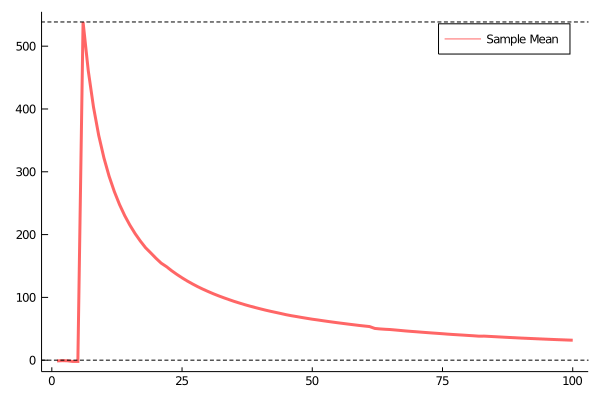

In [7]:
function plot_means(n = 1000)
    sample_mean = cumsum(rand(Cauchy(), n)) ./ (1:n)
    plot(1:n, sample_mean, color = :red, alpha = 0.6, label = "Sample Mean", linewidth = 3)
    return hline!([0,maximum(sample_mean)], color = :black, linestyle = :dash, label = "", grid = false)
end

plot_means(100)

Binomial(100) = Binomial{Float64}(n=100, p=0.5)
pdf(Binomial(100), 1) = 7.888609052210066e-29
pdf(Binomial(100), 1:4) = [7.888609052210066e-29, 3.904861480844048e-27, 1.27558808374239e-25, 3.0933011030752628e-24]


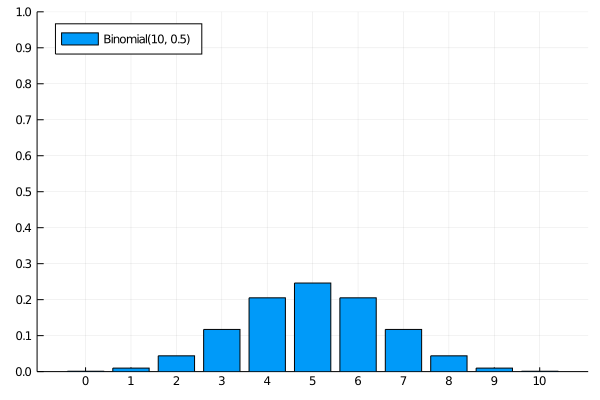

In [14]:
binomial_pdf(n) =
    bar(0:n, pdf.(Binomial(n), 0:n),
        xticks = 0:10, ylim = (0, 1), yticks = 0:0.1:1,
        label = "Binomial($n, 0.5)", legend = :topleft)

@show Binomial(100)
@show pdf(Binomial(100),1)
@show pdf(Binomial(100),1:4)
binomial_pdf(10)

In [16]:
using StatsPlots

In [17]:
function simulation1(distribution, n = 250, k = 10_000)
    σ = std(distribution)
    y = rand(distribution, n, k)
    y .-= mean(distribution)
    y = mean(y, dims = 1)
    y = √n * vec(y)
    density(y, label = "Empirical Distribution")
    return plot!(Normal(0, σ), linestyle = :dash, color = :black,
                 label = "Normal(0.00, $(σ^2))")
end

simulation1 (generic function with 3 methods)

In [23]:
y=rand(Normal(0,2),100,2)
mean(y,dims=1)

1×2 Array{Float64,2}:
 -0.286522  -0.108472

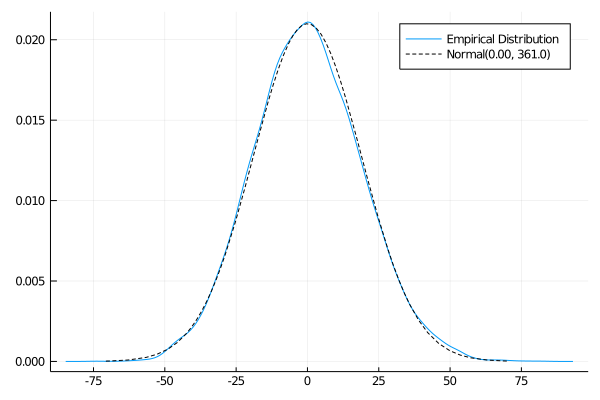

In [25]:
simulation1(Exponential(19))

typeof(y) = Array{Float64,1}


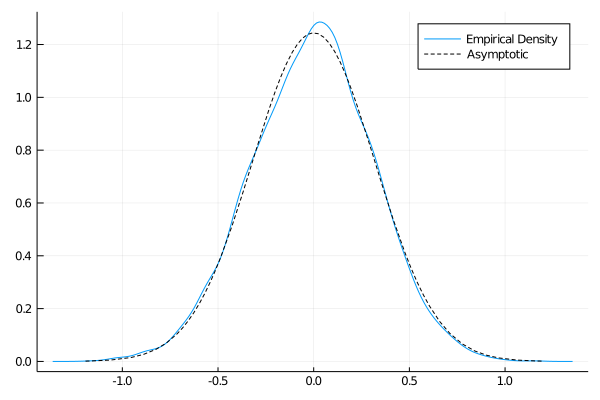

In [12]:
using Distributions
using StatsPlots
function exercise1(distribution = Uniform(0, π/2); n = 250, k = 10_000, g = sin, g′ = cos)
    μ, σ = mean(distribution), std(distribution)
    y = rand(distribution, n, k)
    #if dims =1 mean is caluculated for eat
    y = mean(y, dims = 1)
    #i@show y
    y = vec(y)
    #@show 
    @show typeof(y)
    error_obs = sqrt(n) .* (g.(y) .- g.(μ))
    density(error_obs, label = "Empirical Density")
    return plot!(Normal(0, g′(μ) .* σ), linestyle = :dash, label = "Asymptotic",
                 color = :black)
end



exercise1()